---
# Text를 불러와서 워드클라우드 작업
---

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.express as px

plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 맑은 고딕
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = 15, 10

# 폴리움임포트
import folium
from folium.plugins import MarkerCluster
import json # for 코로플리쓰 
import os
import sys
import urllib.request

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [4]:
with open('./output/choon_text_10000.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [5]:
text.replace('\n', '')

'한국관광 100선 선정 가평, 춘천 남이섬 여행한국관광 100선 서울근교 여행 가평 춘천 남이섬 여행 입장권 [춘천여행] 춘천 관광 안내 지도 괜찮은데!홍천, 가평, 춘천 여행 2박 3일 관광 소규모여행차량렌트 춘천 여행 - 강촌 글램핑, &lt;강촌관광농원&gt; : 물놀이도 할 수 있는 [춘천]가족여행 핫플명소 추천 관광ㆍ닭갈비ㆍ카페속초 여행 , 춘천 명동거리 , 속초 더테라스 펜션 , 속초관광시 여행 코스 :: 더잭슨나인스호텔 - 레고랜드 - 춘천하늘빛관광농 [경기도 가평/춘천 여행1일차]춘천 하늘빛 관광농원 엘린, 벨 춘천 한우 맛집 정가네 소갈비(한국관광공사 무슬림 강원도 춘천겨울여행 춘천관광명소 춘천닭갈비맛집 강원도 춘천여행 카페캐빈, 강촌여행 강촌레일파크강촌역 관광 춘천 아이랑 여행하기여름여행, 춘천 가족여행, 초등학생 여행, 부모님 관광가평 남이섬 춘천 놀거리 볼거리 여행코스강원도 숨겨진 관광지 춘천 종합관광안내소 겨울연가나만의 춘천관광코스 완성[강원도여행/춘천 여행] 깔끔한 춘천 숙소 넘버25 호텔 남춘천점레고랜드 코리아,  주차 할인 꿀팁 받고 춘천 가족여행 가보기춘천, 강촌으로 ITX 기차타고 레고랜드 여행가기춘천 여행 스탬프투어로 받은 마들닭갈비 택배 수령 후기강원도 춘천여행 소양강 처녀상&amp;스카이워크강원도 춘천겨울여행 춘천관광명소 소양강처녀상 춘천여행 가볼만한곳 청평사 월송리캠프 야외바베큐장춘천 여행코스 명소 춘천 소양강 스카이워크 당일치기(춘천여행) 소양강댐 시민의 숲과 소양호 주변 산책!춘천은 테마파크,  춘천여행 TOP 5[ 춘천 가족여행 2탄 ] 당일여행_ 삼악산케이블카 타고(요금 춘천 여행코스 카누 타고 중도물레길 데이트2022.07.01~04 즐거운 강원도 여행 시작 춘천 레고랜드춘천 1박 2일 여행 #16: 삼악산 호수 케이블카 데크 산책길 춘천여행 춘천 갈만한곳 김유정문학촌 김유정역춘천 여행 가볼만한곳 경춘선 김유정역 폐역 기찻길 감성4살 아기와 함께한 레고랜드 체험기 : 춘천 여행 이야기아이와 함께 가평 춘천여행 

In [6]:
okt = Okt()

In [7]:
nouns = okt.nouns(text) # 명사만 추출

In [8]:
words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

In [14]:
#제외할 단어 추가
stop_words = "춘천 코스 여행 관광 춘천시 한국 선정 추천" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
c = [word for word in words if not word in stop_words]

In [15]:
c = Counter(c)
c

Counter({'가평': 140,
         '남이섬': 698,
         '서울': 97,
         '근교': 56,
         '입장권': 2,
         '안내': 462,
         '지도': 340,
         '홍천': 25,
         '소규모': 4,
         '차량': 27,
         '렌트': 27,
         '강촌': 272,
         '글램핑': 50,
         '농원': 153,
         '물놀이': 5,
         '가족': 428,
         '명소': 120,
         '닭갈비': 519,
         '카페': 335,
         '속초': 90,
         '명동': 64,
         '거리': 153,
         '테라스': 7,
         '펜션': 7,
         '잭슨': 96,
         '나인': 96,
         '호텔': 2227,
         '레고랜드': 294,
         '하늘빛': 111,
         '경기도': 9,
         '엘린': 9,
         '한우': 52,
         '맛집': 216,
         '정가': 10,
         '소갈비': 10,
         '공사': 182,
         '무슬림': 10,
         '강원도': 1645,
         '겨울': 34,
         '관광명소': 474,
         '캐빈': 12,
         '레일': 105,
         '파크': 132,
         '강촌역': 12,
         '아이': 434,
         '여름': 185,
         '초등학생': 14,
         '부모님': 14,
         '볼거리': 61,
         '관광지': 276,
         '

In [16]:
#가장 많이 나온 단어 100개 저장
counts = Counter(c)
tags = counts.most_common(100)
tags

[('호텔', 2227),
 ('강원도', 1645),
 ('당일치기', 704),
 ('남이섬', 698),
 ('소양강', 605),
 ('낭만', 541),
 ('닭갈비', 519),
 ('체험', 513),
 ('관광명소', 474),
 ('안내', 462),
 ('소양강댐', 446),
 ('아이', 434),
 ('가족', 428),
 ('김유정', 404),
 ('지도', 340),
 ('박물관', 339),
 ('카페', 335),
 ('스카이', 334),
 ('숙소', 328),
 ('베어스', 316),
 ('케이블카', 312),
 ('카누', 308),
 ('투어', 307),
 ('레고랜드', 294),
 ('타고', 288),
 ('관광지', 276),
 ('팸플릿', 276),
 ('강촌', 272),
 ('처녀', 271),
 ('막국수', 267),
 ('주간', 265),
 ('후기', 261),
 ('베니키아', 261),
 ('무장애', 245),
 ('외국인', 243),
 ('여행지', 242),
 ('당일', 237),
 ('가을', 235),
 ('숙박', 234),
 ('안내소', 232),
 ('야경', 232),
 ('뚜벅', 227),
 ('도시', 221),
 ('레일바이크', 220),
 ('와이낫', 217),
 ('맛집', 216),
 ('김유정역', 208),
 ('여름', 185),
 ('공사', 182),
 ('동행', 180),
 ('축제', 178),
 ('춘천역', 177),
 ('국내', 173),
 ('로드', 172),
 ('제이드', 168),
 ('가든', 168),
 ('꿀팁', 166),
 ('정보', 164),
 ('효도', 164),
 ('애니메이션', 160),
 ('누리', 160),
 ('부산', 155),
 ('청평사', 154),
 ('두레', 154),
 ('농원', 153),
 ('거리', 153),
 ('인제', 152),
 ('기차', 148),
 ('페스',

In [20]:
# 이미지 추가(워드크라우드 모양 설정)
mask = Image.new("RGBA",(1000,1000), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('./mask/지도마스킹샘플4.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

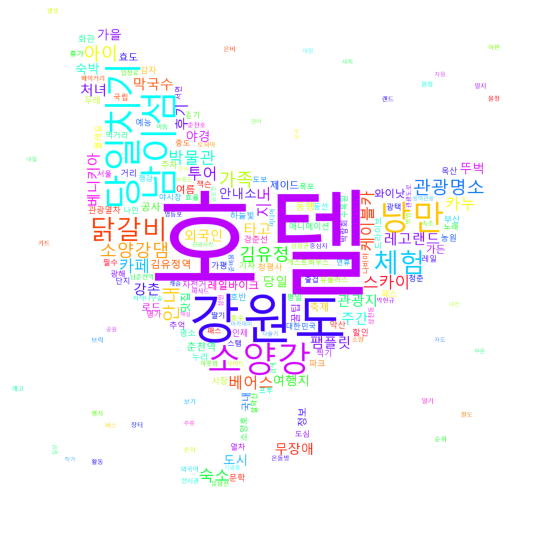

In [25]:
wc = WordCloud(font_path='malgun', width=1000, background_color='white', height=1000, scale=2.0, max_font_size=250, mask=mask, colormap='gist_rainbow').generate_from_frequencies(dict(tags))
gen = wc.generate_from_frequencies(counts)
plt.figure(figsize=(16,10))
plt.imshow(gen)
plt.axis('off')
plt.savefig('./output/춘천.png', bbox_inches='tight')
plt.show()

## 별도 태이블 정리

In [26]:
df = pd.DataFrame(tags)
df.columns = (['연관 검색어', '빈도'])
df.head(10)

,연관 검색어,빈도
0,호텔,2227
1,강원도,1645
2,당일치기,704
3,남이섬,698
4,소양강,605
5,낭만,541
6,닭갈비,519
7,체험,513
8,관광명소,474
9,안내,462


In [27]:
df.head(20)

,연관 검색어,빈도
0,호텔,2227
1,강원도,1645
2,당일치기,704
3,남이섬,698
4,소양강,605
5,낭만,541
6,닭갈비,519
7,체험,513
8,관광명소,474
9,안내,462
